# Egor Howell HD Assignement Code

In [2]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

# read in the data
data = pd.read_csv('DS_Assessment_Dataset_2021.csv')

# data info
data.info()

# remove null values and info
print('')
print('REMOVING NULL VALUES')
print('')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_Age            49506 non-null  float64
 1   Vehicle_Value         49491 non-null  float64
 2   Tax                   49519 non-null  float64
 3   Price                 49504 non-null  float64
 4   Vehicle_Mileage       49464 non-null  float64
 5   Credit_Score          49478 non-null  float64
 6   Licence_Length_Years  49508 non-null  float64
 7   Date                  50000 non-null  object 
 8   Marital_Status        49512 non-null  object 
 9   Sale                  50000 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB

REMOVING NULL VALUES

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46129 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                -------

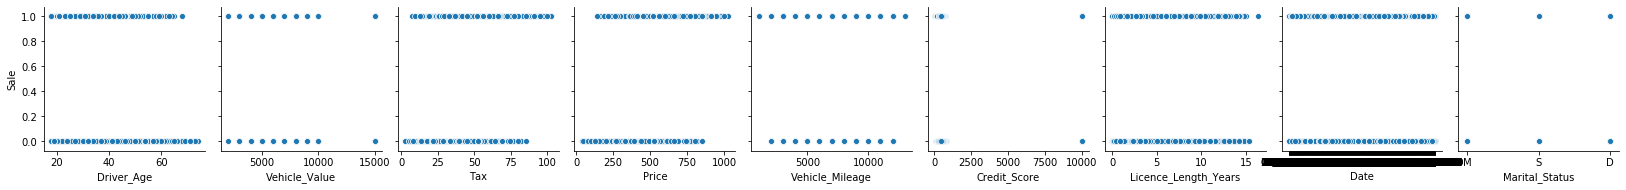

In [2]:
# pair plotting every variable with sale
sn.pairplot(data=data, y_vars=['Sale'], x_vars=['Driver_Age', 'Vehicle_Value', 'Tax', 'Price',
                                                 'Vehicle_Mileage','Credit_Score',
                                                 'Licence_Length_Years', 'Date', 'Marital_Status'])


### Notice that there is not much correlation apart from price and tax. This can be verified by the correlation function in pandas which uses pearson correlation.

In [6]:
# correlation of the features with sale 
data[data.columns[:]].corr()['Sale'][:-1]
data['price/value'] = data['Price'] / data['Vehicle_Value']
data.corr()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Sale,price/value
Driver_Age,1.000000,-0.054987,-0.054546,-0.076164,-0.039520,0.000485,0.684153,-0.254614,0.007106
Vehicle_Value,-0.054987,1.000000,0.356814,0.012598,-0.076317,0.007440,-0.036420,0.003016,-0.619678
Tax,-0.054546,0.356814,1.000000,0.741821,0.101386,0.006182,-0.024631,0.448544,0.254202
Price,-0.076164,0.012598,0.741821,1.000000,0.145633,0.001428,-0.031519,0.664889,0.707979
Vehicle_Mileage,-0.039520,-0.076317,0.101386,0.145633,1.000000,-0.003911,-0.026500,0.003529,0.155204
Credit_Score,0.000485,0.007440,0.006182,0.001428,-0.003911,1.000000,-0.004113,-0.002426,-0.003472
Licence_Length_Years,0.684153,-0.036420,-0.024631,-0.031519,-0.026500,-0.004113,1.000000,-0.120056,0.012981
Sale,-0.254614,0.003016,0.448544,0.664889,0.003529,-0.002426,-0.120056,1.000000,0.478758
price/value,0.007106,-0.619678,0.254202,0.707979,0.155204,-0.003472,0.012981,0.478758,1.000000


### The strongest and most reasonable correlations are with Tax and Price. Therefore, we can think of this as a two dimensional problem as the other features do not significantly affect if the car is bought.

### However, it has not correlated marital status as thats an object type.

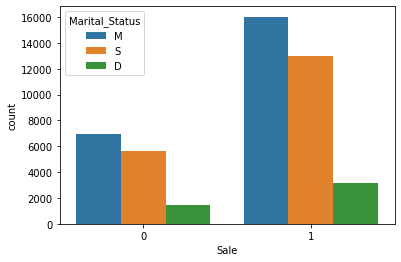

In [3]:
# marital status data
fig = sn.countplot(x='Sale', hue='Marital_Status', data=data)
figure = fig.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

### For married, single or divorced we see that for the three sets the is no distinction. 

### Similarly for Date 

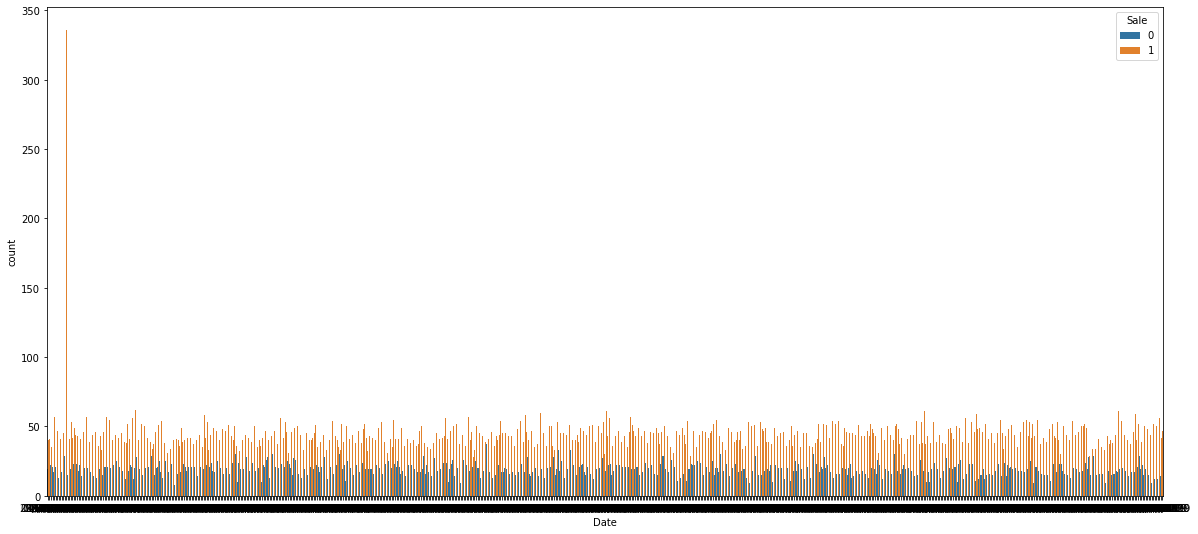

In [4]:
# plotting Date
plt.figure(figsize=(20,9))
sn.countplot(x='Date', hue='Sale', data=data)

### We can now plot the  two dimensional problem.

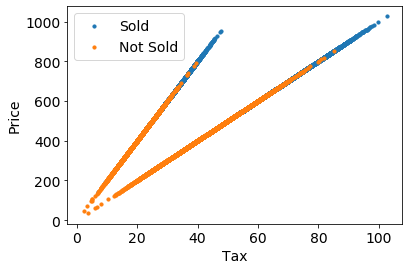

In [5]:
# plotting for tax and price

# extracting the data 
y = data.iloc[:, -1].values
X = data[['Tax', 'Price']]

# identifying which ones sold
sold = data.loc[y == 1]
not_sold = data.loc[y==0]

#plotting the results
plt.scatter(sold.iloc[:, 2], sold.iloc[:, 3], s=10, label='Sold')
plt.scatter(not_sold.iloc[:, 2], not_sold.iloc[:, 3], s=10, label='Not Sold')
plt.legend(fontsize=14)
plt.xlabel('Tax',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.savefig("test.png",bbox_inches='tight')
plt.show()


### As this is binary, we can class this as a Logistic Regression problem. Therefore, we can carry out this supervised learning technique. 

In [6]:
# start by splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

# call the model and apply it the the train set
model = LogisticRegression(solver='newton-cg', C=1, random_state=1)
model.fit(x_train, y_train)
score = model.score(x_train, y_train)

print('Train Accuracy:', model.score(x_train, y_train))


Train Accuracy: 0.8579790260954394


In [7]:
# using the predicted values using the test set
y_pred = model.predict(x_test)
print('Test Accuracy:', model.score(x_test, y_test))

Test Accuracy: 0.8572512464773466


### Both the test data and train data agree well. We now plot the line generated by this model.

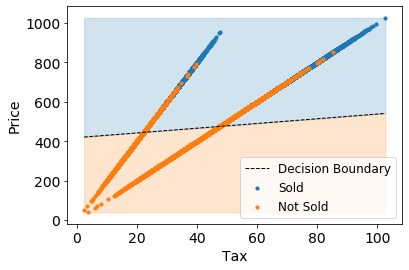

In [8]:
# retrieve the intercept and gradients
b = model.intercept_[0]
w1, w2 = model.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# generate the line
#xmin, xmax = data['Tax'].argmin(), data['Tax'].argmax()
#ymin, ymax = data['Price'].argmin(), data['Price'].argmax()

xmin, xmax = 2.424954, 102.645206
ymin, ymax = 38.520108, 1026.452055
xd = np.array([xmin, xmax])
yd = m*xd + c

# plot the data
plt.plot(xd, yd, 'k', lw=1, ls='--',label='Decision Boundary')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)
plt.scatter(sold.iloc[:, 2], sold.iloc[:, 3], s=10, label='Sold')
plt.scatter(not_sold.iloc[:, 2], not_sold.iloc[:, 3], s=10, label='Not Sold')
plt.legend(fontsize=12)
plt.xlabel('Tax',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("test1.png",bbox_inches='tight')
plt.show()

In [9]:
# view the classifcation report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.71      0.76      2857
           1       0.88      0.92      0.90      6369

    accuracy                           0.86      9226
   macro avg       0.84      0.82      0.83      9226
weighted avg       0.85      0.86      0.85      9226



Text(0.5, 1, 'Accuracy of Model: 0.8579790260954394')

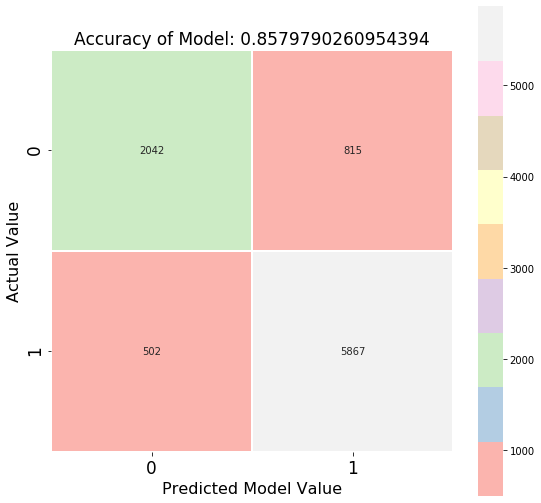

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual Value', fontsize=16)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Predicted Model Value', fontsize=16)
all_sample_title = 'Accuracy of Model: {0}'.format(score)
plt.savefig("test2.png",bbox_inches='tight')
plt.title(all_sample_title, size = 17)
